In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [3]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [4]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.912353,-1.710463,-0.417116,1.210713,1.932255,1
1,-1.637207,-1.360233,0.693693,0.506726,0.840387,1
2,1.694747,2.658544,-0.493380,0.388204,-0.601393,0
3,1.642935,1.316231,0.618222,-3.035618,1.042577,0
4,-1.214127,2.498304,-0.729971,-2.133926,-0.633991,0


In [5]:
# function for row sampling

def sample_rows(df,percent):  # it give random data from dataset
  return df.sample(int(percent*df.shape[0]),replace=True)

In [6]:
import random

In [7]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [8]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [9]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\rosha\AppData\Local\Temp\ipykernel_21956\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [10]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\rosha\AppData\Local\Temp\ipykernel_21956\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [11]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\rosha\AppData\Local\Temp\ipykernel_21956\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [12]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col5', 'col3', 'target'], dtype='object')
Index(['col3', 'col2', 'target'], dtype='object')
Index(['col5', 'col4', 'target'], dtype='object')


In [24]:
df3

,col5,col4,target
86,1.078562,3.033772,1
39,-2.468427,-1.923551,0
19,-0.392482,-1.011753,0
54,-2.818725,-0.580165,0
63,-1.160315,0.010958,0
24,-0.140854,-4.045290,0
90,-0.571818,1.143362,1
55,0.077898,1.469386,1
92,-0.445849,-0.697397,0
42,-2.075751,0.342995,0


In [14]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [15]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [16]:
from sklearn.tree import plot_tree

[Text(0.5, 0.875, 'x[1] <= 0.138\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.25, 0.625, 'x[0] <= 0.316\ngini = 0.26\nsamples = 26\nvalue = [22, 4]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.375, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.75, 0.625, 'x[1] <= 0.602\ngini = 0.08\nsamples = 24\nvalue = [1, 23]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= 0.504\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.75, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]')]

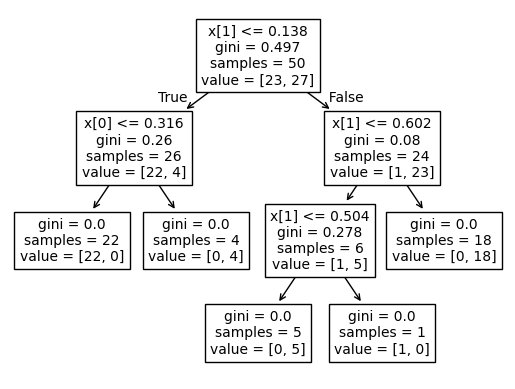

In [17]:
plot_tree(clf1)

[Text(0.5, 0.9, 'x[1] <= -0.715\ngini = 0.449\nsamples = 50\nvalue = [33, 17]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.41666666666666663, 0.8, 'True  '),
 Text(0.6666666666666666, 0.7, 'x[0] <= 2.527\ngini = 0.193\nsamples = 37\nvalue = [33, 4]'),
 Text(0.5833333333333333, 0.8, '  False'),
 Text(0.5, 0.5, 'x[1] <= 0.264\ngini = 0.108\nsamples = 35\nvalue = [33, 2]'),
 Text(0.3333333333333333, 0.3, 'x[0] <= -0.425\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.16666666666666666, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]'),
 Text(0.8333333333333334, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

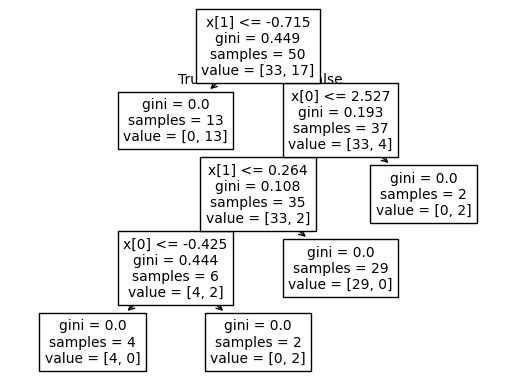

In [18]:
plot_tree(clf2)

[Text(0.5555555555555556, 0.9, 'x[0] <= -0.069\ngini = 0.497\nsamples = 50\nvalue = [27, 23]'),
 Text(0.3333333333333333, 0.7, 'x[1] <= 1.13\ngini = 0.231\nsamples = 30\nvalue = [26, 4]'),
 Text(0.4444444444444444, 0.8, 'True  '),
 Text(0.2222222222222222, 0.5, 'x[1] <= 0.713\ngini = 0.071\nsamples = 27\nvalue = [26, 1]'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.3333333333333333, 0.3, 'x[1] <= 0.967\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2222222222222222, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.4444444444444444, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.7777777777777778, 0.7, 'x[1] <= -0.172\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.6666666666666667, 0.8, '  False'),
 Text(0.6666666666666666, 0.5, 'x[1] <= -0.487\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5555555555555556, 0.3, 'gini = 0.0\nsamples =

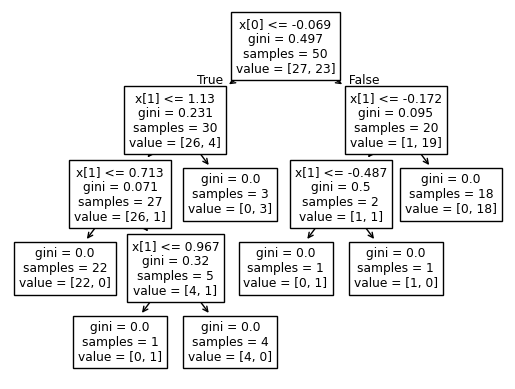

In [19]:
plot_tree(clf3)

In [20]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\rosha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [21]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\rosha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [22]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\rosha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [23]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
38,0.310740,1.911912,0.949292,0.578892,-0.015495,0
96,0.056565,2.693978,-1.913015,-1.934827,-0.499970,0
74,0.104606,-1.673973,-0.326223,1.828435,2.462274,1
50,-2.465563,-1.107440,2.524341,1.275099,-0.907071,1
15,0.037843,-1.455425,0.579987,1.202273,1.902998,1
37,-1.119597,-1.327474,1.509968,0.020761,0.931031,1
20,1.214871,0.362856,-2.089635,-2.193701,-1.456426,0
24,2.528759,0.981527,-1.004609,-4.045290,-0.140854,0
51,0.430587,0.144573,0.053022,2.537004,2.083824,1
77,0.537021,0.515922,-1.184647,-0.136298,-1.298471,0
